In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import make_swiss_roll
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

In [ ]:
sr = make_swiss_roll(10000)[0]

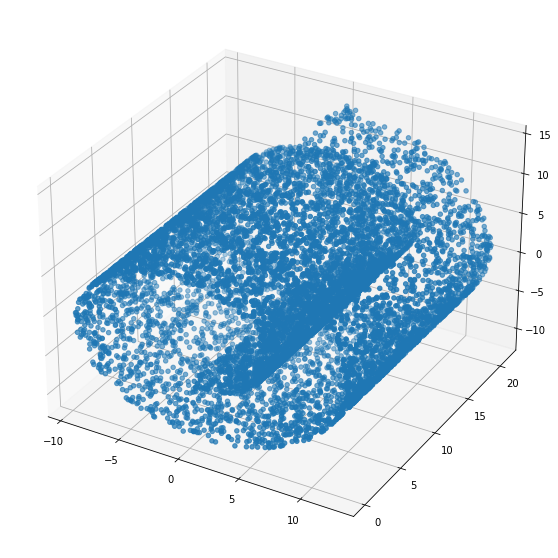

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(*sr.T)

In [ ]:
pca = PCA(n_components=3)

In [ ]:
sr_reduced = pca.fit_transform(sr)

In [ ]:
pca.explained_variance_ratio_

array([0.39682298, 0.32097914, 0.28219788])

/usr/local/lib/python3.9/dist-packages/matplotlib/collections.py:981: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


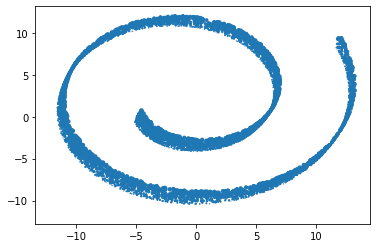

In [ ]:
plt.scatter(*sr_reduced.T)

In [ ]:
#cargar datos desde drive acceso libre
FILEID = "1vrk5heTgxMBZagbw62SSVSWvfrW--Jgz"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O codigos.zip && rm -rf /tmp/cookies.txt
!unzip codigos.zip
!dir

^C
Archive:  codigos.zip
replace datasets/housing/housing.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
codigos.zip  datasets  drive  sample_data


In [1]:
housing = pd.read_csv('datasets/housing/housing.csv')
housing.drop(columns=['ocean_proximity'], inplace=True)
housing.iloc[:,:-1].info()

NameError: ignored

In [ ]:
imputer = SimpleImputer(strategy='median')
np.isnan(imputer.fit_transform(housing)).any()

False

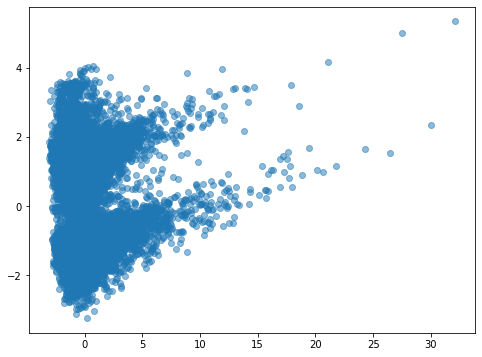

In [ ]:
pipeline_pca = Pipeline([('imputer', SimpleImputer(strategy='median')),
                          ('scaler', StandardScaler()),
                          ('pca', PCA())])
def plot_variance_pca(X):
  pipeline_pca.fit(X)
  variance_ratio = pipeline_pca.named_steps['pca'].explained_variance_ratio_
  plt.plot(range(1, X.shape[1] + 1), np.cumsum(variance_ratio))
  plt.ylim(0, 1)

def plot_data_pca(X):
  pipeline_pca.fit(X)
  X_transformed = pipeline_pca.transform(X)[:,:2]
  plt.figure(figsize=(8, 6))
  plt.scatter(*X_transformed.T, alpha=0.5)
plot_data_pca(housing)

In [ ]:
fifa = pd.read_csv('datasets/data_fifa19.csv')
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [ ]:
imputer = SimpleImputer(strategy="median")
housing = imputer.fit_transform(housing)

In [ ]:
scaler = StandardScaler()
housing_norm = scaler.fit_transform(housing)

In [ ]:
pca2 = PCA()
housing_red = pca2.fit_transform(housing_norm)[:,:2]

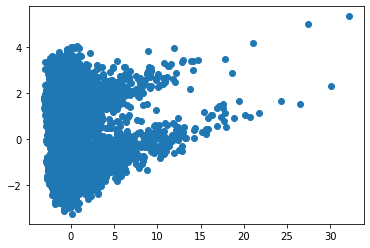

In [ ]:
plt.scatter(*housing_red.T)

In [ ]:
pca2.explained_variance_ratio_

array([0.43401537, 0.21361109, 0.1885435 , 0.10112648, 0.03256968,
       0.01602212, 0.00697467, 0.00495498, 0.00218211])

In [ ]:
np.cumsum(pca2.explained_variance_ratio_)

array([0.43401537, 0.64762646, 0.83616996, 0.93729644, 0.96986612,
       0.98588824, 0.99286291, 0.99781789, 1.        ])

(0.0, 1.0)

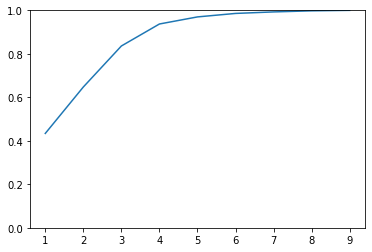

In [ ]:
plt.plot(range(1, pca2.n_components_ + 1), np.cumsum(pca2.explained_variance_ratio_))
plt.ylim(0, 1)

In [ ]:
plt.ylim

[0, 1]